# Binary Real Estate Price Predictor

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression

In [252]:
housing = pd.read_csv("housing_data.csv")

In [253]:
housing.head()  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [254]:
housing.shape

(506, 14)

In [255]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1    ZN       506 non-null    float64
 2    INDUS    506 non-null    float64
 3    CHAS     506 non-null    int64  
 4    NOX      506 non-null    float64
 5    RM       501 non-null    float64
 6    AGE      506 non-null    float64
 7    DIS      506 non-null    float64
 8    RAD      506 non-null    int64  
 9    TAX      506 non-null    int64  
 10   PTRATIO  506 non-null    float64
 11   B        506 non-null    float64
 12   LSTAT    506 non-null    float64
 13   MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [256]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287864,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705268,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Looks like our feature names has spaces to it. We can simply strip off all the spaces from the colum names.

In [257]:
housing.columns

Index(['CRIM', ' ZN', ' INDUS', ' CHAS', ' NOX', ' RM', ' AGE', ' DIS', ' RAD',
       ' TAX', ' PTRATIO', ' B', ' LSTAT', ' MEDV'],
      dtype='object')

In [258]:
housing.columns = housing.columns.str.strip()

In [259]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [260]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

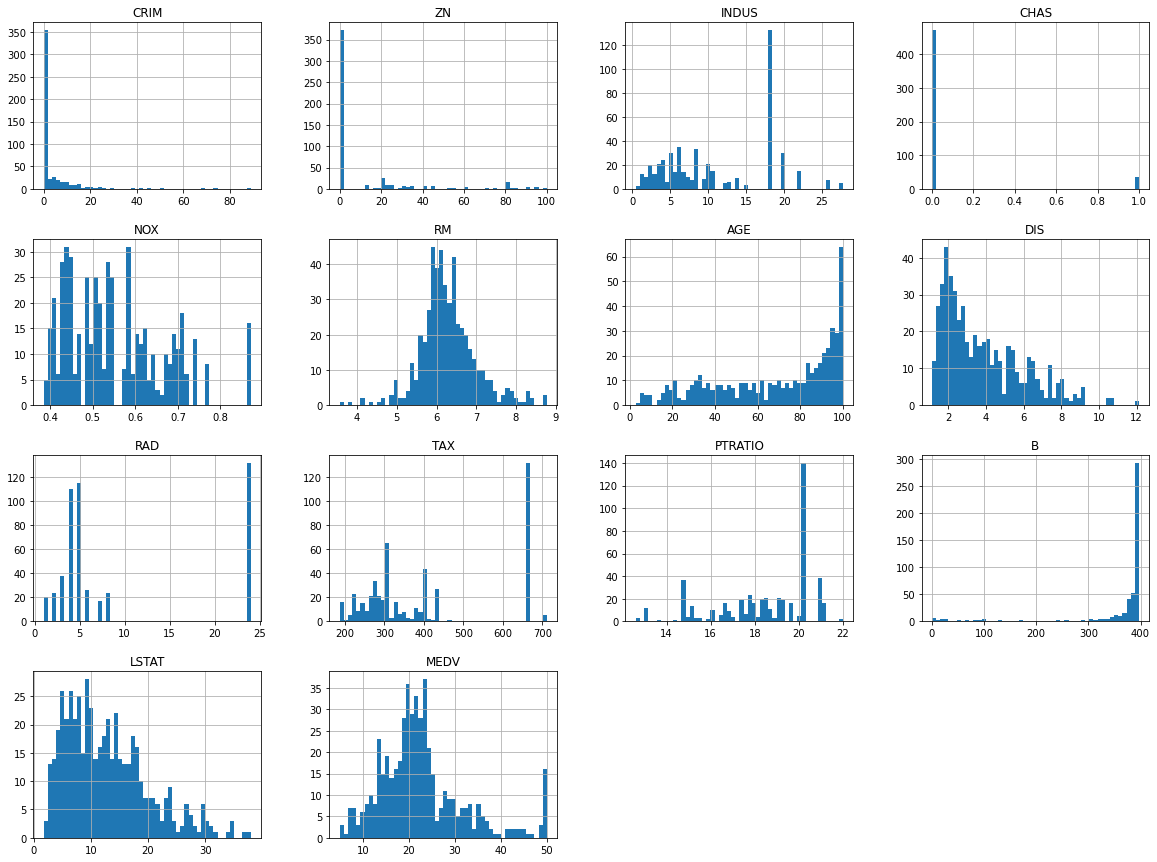

In [261]:
housing.hist(bins=50, figsize=(20,15))

### Train Test Split

In [262]:
X = housing.iloc[:, :13]

y = housing.loc[ :, 'MEDV']

In [263]:
X.head()
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [265]:
print(X_train['CHAS'].value_counts())
# print(y_train)

0    375
1     29
Name: CHAS, dtype: int64


As the feature 'CHAS' has only two values 0 & 1 and the ratio of these values are divided and might affect our model biased to 0 over 1, We can use Stratified Shuffling to make sure our data shuffled with diverse values.

In [266]:
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in stratified_split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [267]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [268]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [269]:
housing = strat_train_set.copy()

### Corelations

In [270]:
correaltion = housing.corr()

correaltion

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.212927,0.416640,-0.061482,0.430879,-0.260499,0.361890,-0.386900,0.648221,0.603934,0.305603,-0.486869,0.471442,-0.393715
ZN,-0.212927,1.000000,-0.542161,-0.023536,-0.509327,0.293323,-0.565680,0.666939,-0.306480,-0.322803,-0.390570,0.188575,-0.420097,0.339741
INDUS,0.416640,-0.542161,1.000000,0.043686,0.759051,-0.387172,0.644114,-0.708612,0.580908,0.716288,0.384465,-0.368685,0.611068,-0.473516
CHAS,-0.061482,-0.023536,0.043686,1.000000,0.077490,0.098738,0.058388,-0.088081,-0.023005,-0.048802,-0.132682,0.048275,-0.077592,0.205066
NOX,0.430879,-0.509327,0.759051,0.077490,1.000000,-0.304677,0.727358,-0.763623,0.596012,0.659049,0.164977,-0.408434,0.602386,-0.422873
RM,-0.260499,0.293323,-0.387172,0.098738,-0.304677,1.000000,-0.248526,0.211235,-0.202917,-0.285630,-0.334458,0.125209,-0.603564,0.680469
AGE,0.361890,-0.565680,0.644114,0.058388,0.727358,-0.248526,1.000000,-0.734827,0.449489,0.501491,0.259633,-0.287900,0.599211,-0.364596
DIS,-0.386900,0.666939,-0.708612,-0.088081,-0.763623,0.211235,-0.734827,1.000000,-0.481556,-0.530840,-0.215173,0.309222,-0.501408,0.240451
RAD,0.648221,-0.306480,0.580908,-0.023005,0.596012,-0.202917,0.449489,-0.481556,1.000000,0.910932,0.471912,-0.490951,0.479857,-0.374693
TAX,0.603934,-0.322803,0.716288,-0.048802,0.659049,-0.285630,0.501491,-0.530840,0.910932,1.000000,0.473026,-0.475293,0.534228,-0.456657


In [271]:
correaltion['MEDV'].sort_values(ascending=False)    #MEDV is our target varaible

MEDV       1.000000
RM         0.680469
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:>

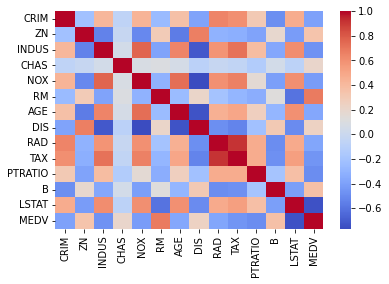

In [272]:
sns.heatmap(housing.corr(), cmap='coolwarm')

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

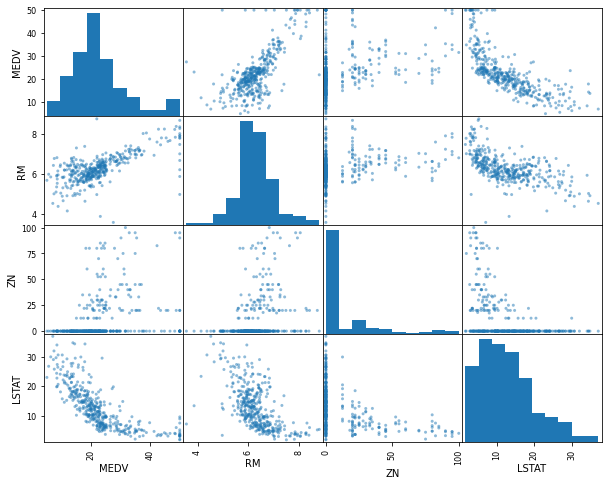

In [273]:
# attributes  with strong co relations
from pandas.plotting import scatter_matrix

attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']

scatter_matrix(housing[attributes], figsize=(10,8))


MEDV has intresting relation with RM and LSTAT

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

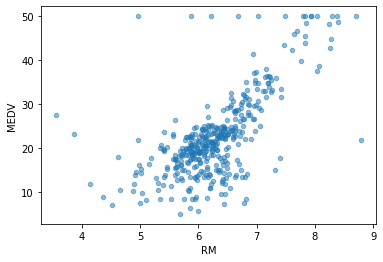

In [274]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.5)

### Trying Attribute combinations / Measures

In [275]:
housing['TAXRM'] = housing['TAX'] / housing['RM']

In [276]:
housing['TAXRM'].sample(5)

289     44.630617
445    103.111937
127     76.760934
266     37.639008
214     51.182557
Name: TAXRM, dtype: float64

In [277]:
correaltion = housing.corr()

correaltion['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680469
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.526137
LSTAT     -0.740494
Name: MEDV, dtype: float64

The new measure TAXRM has the second most negatively relationship with target variable 'MEDV', Intresting!

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

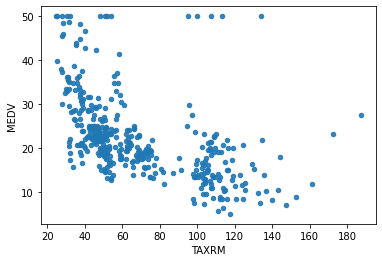

In [278]:
housing.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=0.9)

In [279]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

### **Filling missing values**

As our dataset don't have any missing values, We will go on and delete some values to understand how to fillin the missing values If we come across such cases in any project.


To take care of mising attributes, we have three options:

1. Get rid of missing data points.
2. Get rid of whole attributes.
3. Fill the values with either 0 or mean or median.

Things to note before dropping missing data points in an attributes or a whole attribute:
1. Check how important the attribute is, If the attribute has high co relation with our target variable or label then we cannot simply go and drop the whole attribue, In this case we can simply fill the missing values.

Let's go on and explore all the options just for fun.

In [280]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB


In [281]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283905,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716417,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.219000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.633000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


Notice that feature RM has some missing values

**Option 1: Get rid of missing data points.**

In [282]:
missing_values_dataset1 = housing.dropna(subset=["RM"])
missing_values_dataset1.shape

(399, 13)

As we can see the shape has been reduced from 506 to 501 after dropping the missing values data points

**Option 2: Get rid of Whole attribute.**

In [283]:
missing_values_datase2 = housing.drop("RM", axis=1)

missing_values_datase2.shape

(404, 12)

In [284]:
missing_values_datase2.columns

# Nptice that there is no RM Column

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

**3. Fill the values with either 0 or mean or median**

In [285]:
median_val = housing['RM'].median()

median_val

6.219

In [286]:
housing['RM'].fillna(median_val)

# Original dataframe is still unchange as we have not used inplace True


254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [287]:
housing.isnull().sum().sort_values(ascending=False).head(3)

RM      5
CRIM    0
ZN      0
dtype: int64

In [288]:
housing.describe() # Before we started filling missing values (imputer)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283905,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716417,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.219000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.633000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [289]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(housing)

SimpleImputer(strategy='median')

In [290]:
imputer.statistics_ # Imputer calculate median value for all the columns

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [291]:
X = imputer.transform(housing) # It will fill all the missing values with their respective median value


In [292]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [293]:
housing_tr.isnull().sum().sort_values(ascending=False).head(3)
# All the null values has been filled with the respective median values

CRIM     0
ZN       0
INDUS    0
dtype: int64

In [294]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283101,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711995,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.219000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


### **Scikit-learn Design**

Primarily, three types of objects

1. Estimators - It estimates some parameter based on a dataset.
Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters
2. Transformers - Transform method takes input and returns output based on the learnings from fit().
It also has a convenience function called fit_transform() which fits and then transforms.
3. Predictors - LinearRegression model is an example of predictor.
fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

### **Feature Scaling**

Primeraly Two types:
1. Normalization:
In Normalization, We simply normalize long value into small range like 0 to 1. One type of Normalization is where we divide a value with it max value. 
An another way of normalization is of (value - min / max - min).
Sklearn provides class called MinMaxScalar for this.

2. Standardization:
In Standardization, We make varience as 1 and mean will remain 0. Standardization is a process of converting a distribution into Standard Normal Distribution, Where Mean = 0 & Variance = 1.
(value - mean / std).
Sklearn provides class called StandardScaler for this.

**Advantage of Feature Scaling:**
1. Memory allocation will be easy as it will convert features beween 0 and 1.
2. Most of the machine learning algorithms performs well when numerical attributes are in a same scale. Normalization and Standardization helps us to convert them into same scale.

### **Creating a Pipeline**

In [295]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [296]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [297]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [298]:
housing_num_tr = my_pipeline.fit_transform(housing)

housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [299]:
housing_num_tr.shape

(404, 13)

In [300]:
housing_labels.shape # Target variable or label MEDV

(404,)

## Selecting a desired model for Binary Real Estates

In [301]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [302]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]

some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [303]:
prepared_data = my_pipeline.transform(some_data)

prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.2462356 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.49485555, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28251254,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13063808, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.04063839, -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

In [304]:
model.predict(prepared_data)

array([23.94487358, 27.2173339 , 20.5761168 , 25.01972938, 23.72094918])

In [305]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

### Model 1: LinearRegression

In [306]:
from sklearn.metrics import mean_squared_error

In [307]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [308]:
housing_predictions = linear_regression_model.predict(housing_num_tr)

lin_mse = mean_squared_error(housing_labels, housing_predictions)

lin_rmse = np.sqrt(lin_mse)

In [309]:
lin_rmse


4.8314509709366735

### Model 2: LinearRegression

In [310]:
from sklearn.tree import DecisionTreeRegressor

decision_regression_model = DecisionTreeRegressor()

decision_regression_model.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor()

In [311]:
housing_predictions = decision_regression_model.predict(housing_num_tr)

dtr_mse = mean_squared_error(housing_labels, housing_predictions)

dtr_rmse = np.sqrt(dtr_mse)

In [312]:
dtr_rmse

0.0

## Model 3: Random Forest

In [313]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor_model = RandomForestRegressor()

random_forest_regressor_model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [314]:
housing_predictions = random_forest_regressor_model.predict(housing_num_tr)

rfr_mse = mean_squared_error(housing_labels, housing_predictions)

rfr_rmse = np.sqrt(dtr_mse)

In [315]:
rfr_rmse

0.0

In [316]:
def print_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

Note: The model DecisionTreeRegressor is giving 0 errors which means It has done over fitting. Over fitting can lead to large errors for test data & we nee to handle this with cross validation.

### Using better evaluation technique - Cross Validation

In [317]:
from sklearn.model_selection import cross_val_score

In [318]:
scores = cross_val_score(linear_regression_model, housing_num_tr, housing_labels, scoring='neg_mean_squared_error')

lr_rmse_scores = np.sqrt(-scores)

In [319]:
print_scores(lr_rmse_scores)

Scores: [4.22165674 4.47942104 4.9626517  6.3455312  5.27903604]
Mean: 5.0576593420611875
Standard Deviation: 0.7416074310183527


In [320]:
scores = cross_val_score(decision_regression_model, housing_num_tr, housing_labels, scoring='neg_mean_squared_error')

dr_rmse_scores = np.sqrt(-scores)

In [321]:
print_scores(dr_rmse_scores)

Scores: [5.04257185 4.19444077 5.24529183 5.29032427 3.27972941]
Mean: 4.61047162539337
Standard Deviation: 0.7740624572596932


In [322]:
scores = cross_val_score(random_forest_regressor_model, housing_num_tr, housing_labels, scoring='neg_mean_squared_error')

rfr_rmse_scores = np.sqrt(-scores)

In [323]:
print_scores(rfr_rmse_scores)

Scores: [2.95395316 3.43066998 3.03176872 4.15643462 3.10287759]
Mean: 3.335140813769756
Standard Deviation: 0.4415731417540768


We can see that out of all the models we have selected, Random Forest is giving us less errors, so we will go with Random Forest.

In [324]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [325]:
housing_predictions = model.predict(housing_num_tr)

mse = mean_squared_error(housing_labels, housing_predictions)

rmse = np.sqrt(mse)

scores = cross_val_score(model, housing_num_tr, housing_labels, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-scores)

print_scores(rmse_scores)


Scores: [2.8227153  3.65901275 2.98200724 4.02811156 3.17191689]
Mean: 3.332752746632811
Standard Deviation: 0.4469895387751488


### Saving the model

In [326]:
from joblib import load, dump

dump(model, 'BinaryEstates.joblib')

['BinaryEstates.joblib']

### Testing the model

In [327]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

# print(Y_test)
# print(final_predictions)

In [328]:
final_rmse

3.02158138053829

We are getting only 3 as our data for a data set with maximum of 505 attributes which means our model is performing very well.

### Using the model

In [329]:
from joblib import load, dump

model = load('BinaryEstates.joblib')

In [330]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2462356 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [331]:
features = np.array([[-0.43942006,  1.192628155, -1.12165014, -0.27288841, -1.42262747,
       0.2462356 , -91.31238772,  23.61111401, -1.0016859 , -1.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])

model.predict(features)

array([26.792])